## ====EDA====

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import data from 'cancer_classification.csv'

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## explore nulls and data distributions

In [4]:
# explore nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
# distributions
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### explore data balance

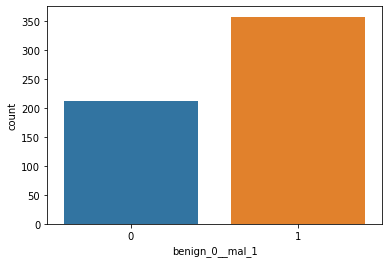

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

### explore features/label correlations

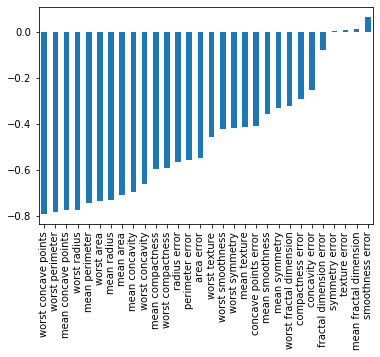

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

### explore correlations with heatmap

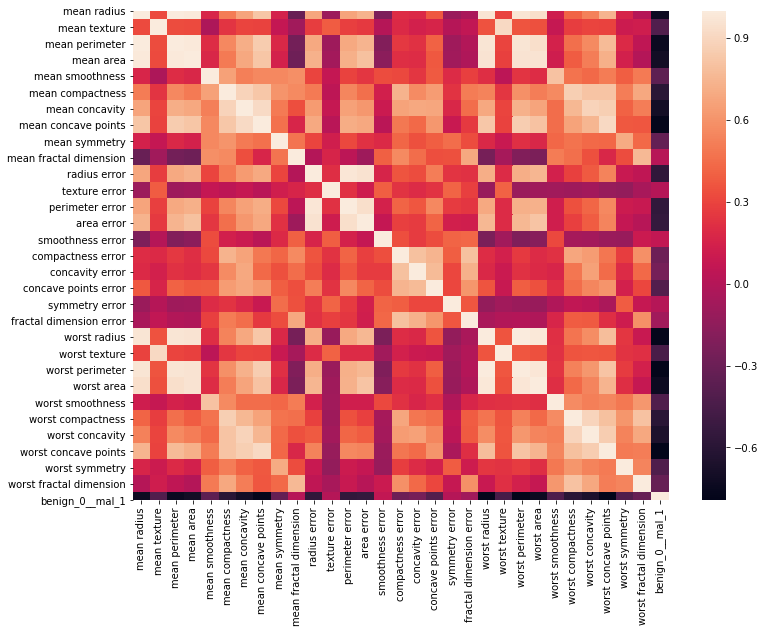

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

## ====Preprocessing====

### split data

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train.shape

(426, 30)

### scale data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.max()

1.0000000000000002

## ====Dealing with Overfitting and Evaluations====

### model1: build a basic overfitted model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
#add layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy',optimizer='adam')


### train model1

In [18]:
# train a model that will overfit the dataset
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6555 - val_loss: 0.6279
Epoch 2/600
426/426 [==============================] - 0s 69us/sample - loss: 0.6222 - val_loss: 0.5897
Epoch 3/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5866 - val_loss: 0.5440
Epoch 4/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5418 - val_loss: 0.4893
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4919 - val_loss: 0.4315
Epoch 6/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4406 - val_loss: 0.3761
Epoch 7/600
426/426 [==============================] - 0s 59us/sample - loss: 0.3903 - val_loss: 0.3256
Epoch 8/600
426/426 [==============================] - 0s 58us/sample - loss: 0.3470 - val_loss: 0.2848
Epoch 9/600
426/426 [==============================] - 0s 61us/sample - loss: 0.3143 - val_loss: 0.2510
Epoch 10/600
426/42

426/426 [==============================] - 0s 62us/sample - loss: 0.0562 - val_loss: 0.0544
Epoch 79/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0553 - val_loss: 0.0553
Epoch 80/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0619 - val_loss: 0.0550
Epoch 81/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0564 - val_loss: 0.0553
Epoch 82/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0567 - val_loss: 0.0542
Epoch 83/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0697 - val_loss: 0.0621
Epoch 84/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0615 - val_loss: 0.0561
Epoch 85/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0530 - val_loss: 0.0537
Epoch 86/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0530 - val_loss: 0.0540
Epoch 87/600
426/426 [==============================] - 0s 61us/samp

426/426 [==============================] - 0s 61us/sample - loss: 0.0374 - val_loss: 0.0640
Epoch 156/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0375 - val_loss: 0.0646
Epoch 157/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0374 - val_loss: 0.0625
Epoch 158/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0379 - val_loss: 0.0669
Epoch 159/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0419 - val_loss: 0.0727
Epoch 160/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0376 - val_loss: 0.0685
Epoch 161/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0355 - val_loss: 0.0625
Epoch 162/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0358 - val_loss: 0.0702
Epoch 163/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0383 - val_loss: 0.0597
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0270 - val_loss: 0.0927
Epoch 233/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0266 - val_loss: 0.0891
Epoch 234/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0252 - val_loss: 0.0978
Epoch 235/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0266 - val_loss: 0.0889
Epoch 236/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0264 - val_loss: 0.0967
Epoch 237/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0252 - val_loss: 0.0947
Epoch 238/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0260 - val_loss: 0.0908
Epoch 239/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0285 - val_loss: 0.1041
Epoch 240/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0260 - val_loss: 0.0939
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0192 - val_loss: 0.1208
Epoch 310/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0255 - val_loss: 0.1425
Epoch 311/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0291 - val_loss: 0.1142
Epoch 312/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0205 - val_loss: 0.1344
Epoch 313/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0204 - val_loss: 0.1199
Epoch 314/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0206 - val_loss: 0.1416
Epoch 315/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0199 - val_loss: 0.1307
Epoch 316/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0187 - val_loss: 0.1304
Epoch 317/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0201 - val_loss: 0.1378
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 62us/sample - loss: 0.0150 - val_loss: 0.1707
Epoch 387/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0179 - val_loss: 0.1626
Epoch 388/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0149 - val_loss: 0.1652
Epoch 389/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0147 - val_loss: 0.1495
Epoch 390/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0164 - val_loss: 0.1559
Epoch 391/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0146 - val_loss: 0.1562
Epoch 392/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0144 - val_loss: 0.1800
Epoch 393/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0153 - val_loss: 0.1478
Epoch 394/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0156 - val_loss: 0.1797
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0123 - val_loss: 0.1830
Epoch 464/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0127 - val_loss: 0.1992
Epoch 465/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0122 - val_loss: 0.1933
Epoch 466/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0141 - val_loss: 0.1951
Epoch 467/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0270 - val_loss: 0.3069
Epoch 468/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0214 - val_loss: 0.1801
Epoch 469/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0147 - val_loss: 0.2224
Epoch 470/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0146 - val_loss: 0.1983
Epoch 471/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0119 - val_loss: 0.2049
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 59us/sample - loss: 0.0094 - val_loss: 0.2327
Epoch 541/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0100 - val_loss: 0.2350
Epoch 542/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0094 - val_loss: 0.2248
Epoch 543/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0096 - val_loss: 0.2275
Epoch 544/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0102 - val_loss: 0.2396
Epoch 545/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0097 - val_loss: 0.2197
Epoch 546/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0148 - val_loss: 0.2094
Epoch 547/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0178 - val_loss: 0.2846
Epoch 548/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0183 - val_loss: 0.1976
Epoch 549/600
426/426 [==============================] - 0s 

### evaluate model1

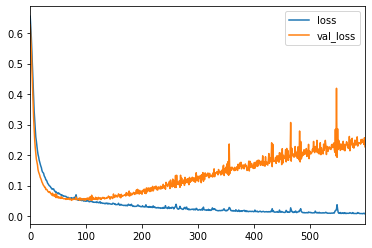

In [20]:
mloss = pd.DataFrame(model.history.history)
mloss.plot()

In [ ]:
#model is overfitting training data

### model2: build a model with early stopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [23]:
model = Sequential()
#add layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy',optimizer='adam')

### train model2

In [25]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6738 - val_loss: 0.6486
Epoch 2/600
426/426 [==============================] - 0s 74us/sample - loss: 0.6436 - val_loss: 0.6122
Epoch 3/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6033 - val_loss: 0.5607
Epoch 4/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5556 - val_loss: 0.5073
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5078 - val_loss: 0.4525
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4584 - val_loss: 0.4021
Epoch 7/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4154 - val_loss: 0.3541
Epoch 8/600
426/426 [==============================] - 0s 57us/sample - loss: 0.3717 - val_loss: 0.3127
Epoch 9/600
426/426 [==============================] - 0s 59us/sample - loss: 0.3372 - val_loss: 0.2784
Epoch 10/600
426/42

426/426 [==============================] - 0s 61us/sample - loss: 0.0601 - val_loss: 0.0563
Epoch 79/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0550 - val_loss: 0.0579
Epoch 80/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0574 - val_loss: 0.0531
Epoch 81/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0563 - val_loss: 0.0545
Epoch 82/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0604 - val_loss: 0.0517
Epoch 83/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0563 - val_loss: 0.0529
Epoch 84/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0535 - val_loss: 0.0547
Epoch 85/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0523 - val_loss: 0.0544
Epoch 86/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0532 - val_loss: 0.0558
Epoch 87/600
426/426 [==============================] - 0s 61us/samp

### evaluate model2

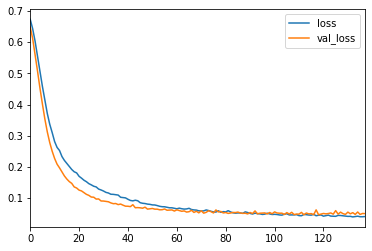

In [27]:
mloss = pd.DataFrame(model.history.history)
mloss.plot()

### model3: build a model with early stopping + dropout layer

In [28]:
from tensorflow.keras.layers import Dropout

In [29]:
model = Sequential()
#add layers
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

#compile
model.compile(loss='binary_crossentropy',optimizer='adam')

### train model3

In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test),verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6909 - val_loss: 0.6659
Epoch 2/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6781 - val_loss: 0.6481
Epoch 3/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6665 - val_loss: 0.6314
Epoch 4/600
426/426 [==============================] - 0s 62us/sample - loss: 0.6499 - val_loss: 0.6128
Epoch 5/600
426/426 [==============================] - 0s 65us/sample - loss: 0.6329 - val_loss: 0.5893
Epoch 6/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6250 - val_loss: 0.5593
Epoch 7/600
426/426 [==============================] - 0s 65us/sample - loss: 0.5826 - val_loss: 0.5264
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5764 - val_loss: 0.4917
Epoch 9/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5525 - val_loss: 0.4645
Epoch 10/600
426/42

426/426 [==============================] - 0s 66us/sample - loss: 0.1438 - val_loss: 0.0650
Epoch 79/600
426/426 [==============================] - 0s 64us/sample - loss: 0.1255 - val_loss: 0.0621
Epoch 80/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1183 - val_loss: 0.0574
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.1231 - val_loss: 0.0610
Epoch 82/600
426/426 [==============================] - 0s 62us/sample - loss: 0.1199 - val_loss: 0.0699
Epoch 83/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1244 - val_loss: 0.0581
Epoch 84/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1339 - val_loss: 0.0606
Epoch 85/600
426/426 [==============================] - 0s 61us/sample - loss: 0.1155 - val_loss: 0.0570
Epoch 86/600
426/426 [==============================] - 0s 63us/sample - loss: 0.1355 - val_loss: 0.0567
Epoch 87/600
426/426 [==============================] - 0s 62us/samp

### evaluate model3

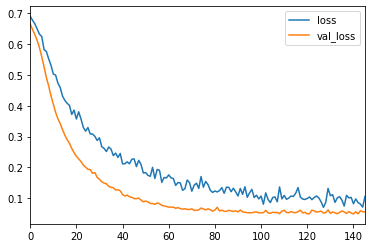

In [31]:
mloss = pd.DataFrame(model.history.history)
mloss.plot()

### perform full evaluation on classes

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict_classes(X_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(y_test,y_pred))

[[53  1]
 [ 2 87]]
